# TEST
## T-test
1. t.test()
2. t.test(paired=True)
3. prop.test()
4. wilcox.test()

In [1]:
# t.test() 분석 사용 예제 MASS 패키지에 내장된 Cars93 데이터 프레임의 가격과 생산국가 중 미국산과 비국산이 아닌 차 가격의 평균이 차이가 있는지 검정해보고
# 95% 신뢰 구간을 추정해 보겠습니다.

library(MASS)
str(Cars93)

'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

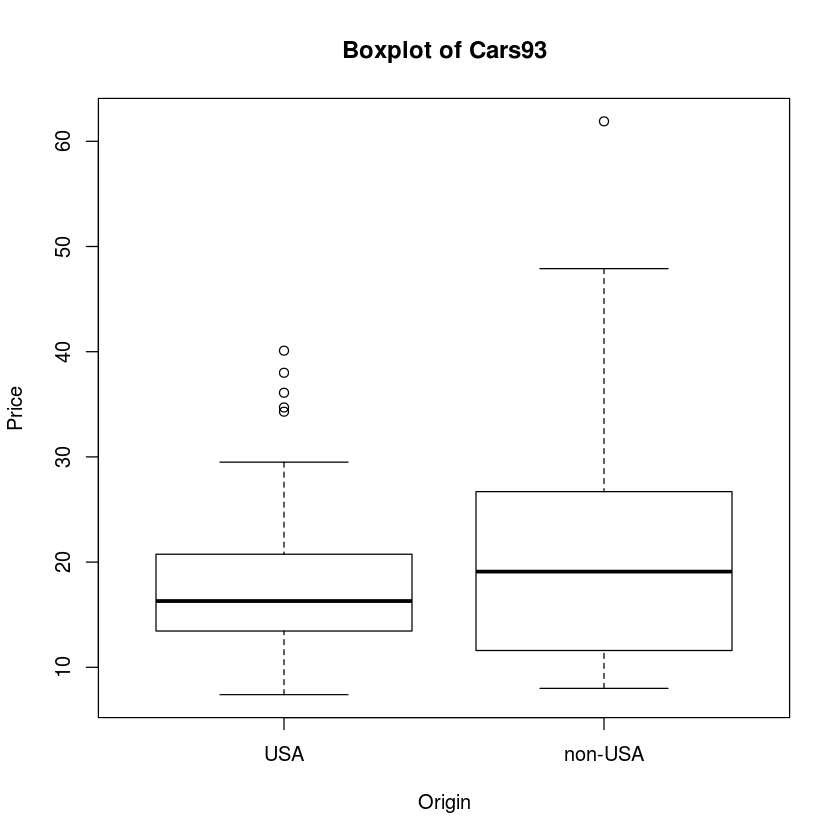

In [2]:
# box plot
boxplot(Price ~ Origin, data = Cars93, main = "Boxplot of Cars93", xlab = 'Origin', ylab = 'Price')

In [3]:
# Histogram
install.packages('ggplot2')


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


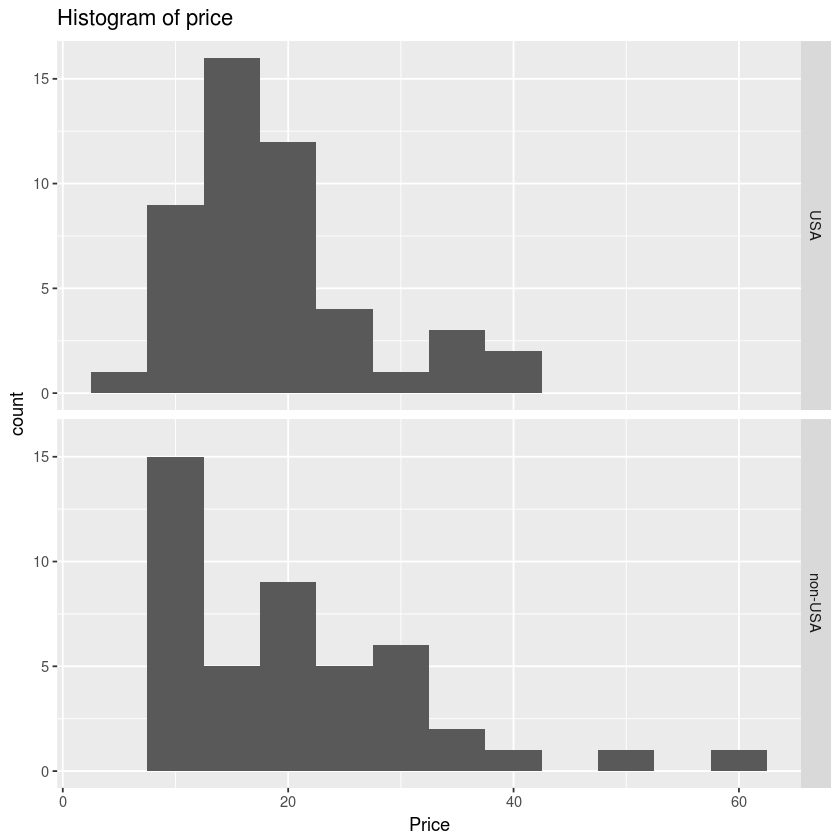

In [4]:
library(ggplot2)
ggplot( Cars93, aes(x =Price)) + geom_histogram(binwidth=5) + facet_grid(Origin ~ .) + ggtitle('Histogram of price')

In [5]:
var.test(Price ~ Origin, data = Cars93)


	F test to compare two variances

data:  Price by Origin
F = 0.47796, num df = 47, denom df = 44, p-value = 0.01387
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2645004 0.8587304
sample estimates:
ratio of variances 
         0.4779637 


In [6]:
t.test(Price ~ Origin, data = Cars93, alternative = c("two.sided"), var.equal = FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  Price by Origin
t = -0.95449, df = 77.667, p-value = 0.3428
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.974255  2.102311
sample estimates:
    mean in group USA mean in group non-USA 
             18.57292              20.50889 


2개의 모집단에 대한 평균을 비교, 분석하는 통계적 기법으로 t-test를 활용하였다면 비교하조자 하는 집단이 3개 이상일 경우에는 **분산분석(ANOVA)** 을 이용합니다.
1. one-way ANOVA의 개념


In [7]:
y1 <- c(50.5, 52.1, 51.9, 52.4, 50.6)
y2 <- c(30.5, 22.1, 54.2, 42.2, 40.26)
y3 <- c(40.5, 42.1, 24.1, 52.14, 30.66)
y <- c(y1,y2,y3)
n <- rep(5,3)
group <- rep(1:3, n)
# combining to data frame
group_df <- data.frame(y, group)
tail(group_df)

,y,group
10,40.26,2
11,40.50,3
12,42.10,3
13,24.10,3
14,52.14,3
15,30.66,3


In [8]:
sapply(group_df, class)

y     group 
"numeric" "integer"

In [9]:
#transform from integer to factor
group_df <- transform(group_df, group = factor(group))

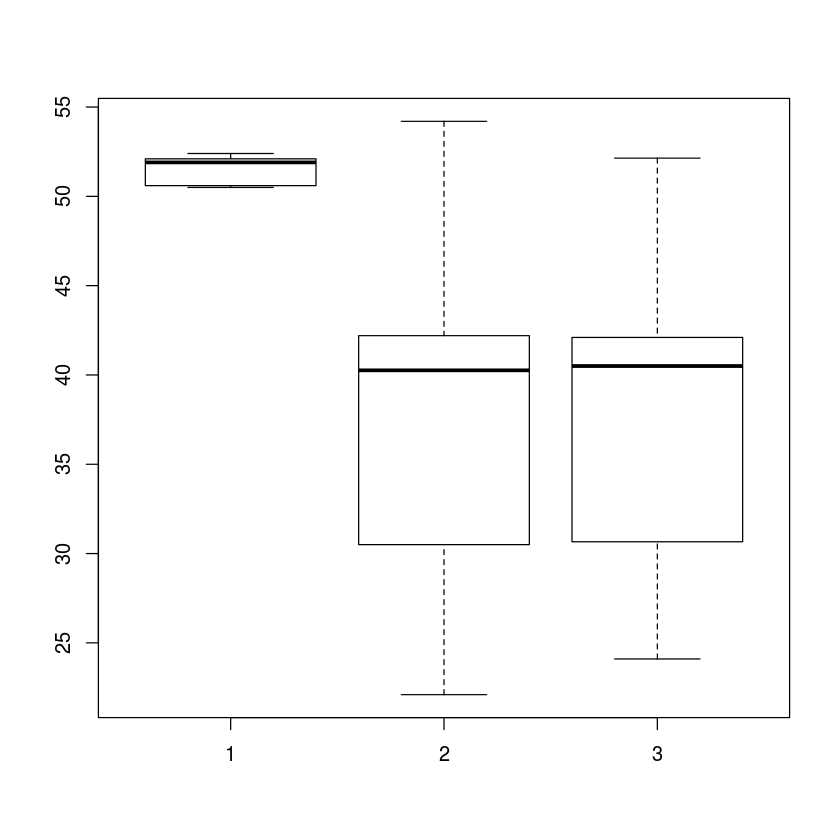

In [10]:
#boxplot
boxplot(y~ group)

In [11]:
#one way ANOVA
aov(y ~ group, data = group_df)

Call:
   aov(formula = y ~ group, data = group_df)

Terms:
                   group Residuals
Sum of Squares   618.717  1067.313
Deg. of Freedom        2        12

Residual standard error: 9.430948
Estimated effects may be unbalanced

In [12]:
summary(aov(y ~ group, data = group_df))

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  618.7  309.36   3.478 0.0644 .
Residuals   12 1067.3   88.94                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### 2way ANOVA
관측값이 하나일 경우와 관측값이 2개일 경우로 나누어 볼 수 있습니다.
첫번째의 경우를 설명

예제1) K와 M 두 보험회사의 차종에 따른 분기별 보험료가 아래 표와 같다고 할 때 유의수준(0.05) 차종과 회사의 효과에 대한 검정을 하라

차종 | K회사 | M회사 | 평균
---|---|---|---
1000cc | 140 | 100 | 120
1500cc | 210 | 180 | 195
1800cc | 220 | 200 | 210
평균 | 190 | 160 | 175

In [13]:
car_type <- rep(c('1000','1500','1800'),2)
car_type <- as.factor(car_type) #transform to factor
car_type

[1] 1000 1500 1800 1000 1500 1800
Levels: 1000 1500 1800

In [14]:
insurance <- as.factor(c(rep('K',3),rep('M',3)))
insurance

[1] K K K M M M
Levels: K M

In [15]:
y <- c(140,210,220,100,180,200)
two_way_aov_model_1 <- aov(y~ car_type + insurance) # no replicates, no interaction
summary(two_way_aov_model_1)

            Df Sum Sq Mean Sq F value Pr(>F)  
car_type     2   9300    4650      93 0.0106 *
insurance    1   1350    1350      27 0.0351 *
Residuals    2    100      50                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

> A 차종에 따르 분산분석 결과 p-values 0.01으로서 유의수준보다 적으므로 차종에 따라서 보험료에 차이가 있다는 대립가설을 채택할 수 있게 되었습니다.
또한, 요인 B  보험 회사에 따르 분산분석 결과또한 유의수준보다 작으므로 회사에 따라 보험료에 차이가 있다는 대립가설을 채택 할 수 있습니다.

### 관측값이 두개 이상일 경우 2WAY ANOVA
관측값이 두개 이상일 경우는 두개의 요인 수준별 주효과와 더불어 두요인이 서로 상호간에 영항을 주고 받으면서 나타나는 반응효과인 *교호작용 효과*를 추가로 분석하는 것이 차이점입니다.


In [16]:
gender.fac <- as.factor(c(rep('M',9),rep('F',9)))
gender.fac

[1] M M M M M M M M M F F F F F F F F F
Levels: F M

In [17]:
class <- c('class_1','class_1','class_1','class_2','class_2','class_2','class_3','class_3','class_3')
class.fac <- as.factor(c(rep(class,2)))

In [18]:
score_stats <- c(71,78,77,78,71,71,78,77,78,71,71,78,77,78,69,74,75,70)
score.df <- data.frame(gender.fac, class.fac, score_stats)

In [19]:
score.df

gender.fac,class.fac,score_stats
M,class_1,71
M,class_1,78
M,class_1,77
M,class_2,78
M,class_2,71
M,class_2,71
M,class_3,78
M,class_3,77
M,class_3,78
F,class_1,71


In [21]:
install.packages('doBy')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [22]:
library(doBy)
summaryBy(score_stats ~ gender.fac, data = score.df, FUN = c(mean,sd,min,max))

gender.fac,score_stats.mean,score_stats.sd,score_stats.min,score_stats.max
F,73.66667,3.535534,69,78
M,75.44444,3.358240,71,78


In [23]:
summaryBy(score_stats ~ class.fac, data = score.df, FUN = c(mean,sd,min,max))

class.fac,score_stats.mean,score_stats.sd,score_stats.min,score_stats.max
class_1,74.33333,3.669696,71,78
class_2,74.00000,4.098780,69,78
class_3,75.33333,3.076795,70,78


In [24]:
summary(score_stats, data = score.df)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  69.00   71.00   76.00   74.56   78.00   78.00 

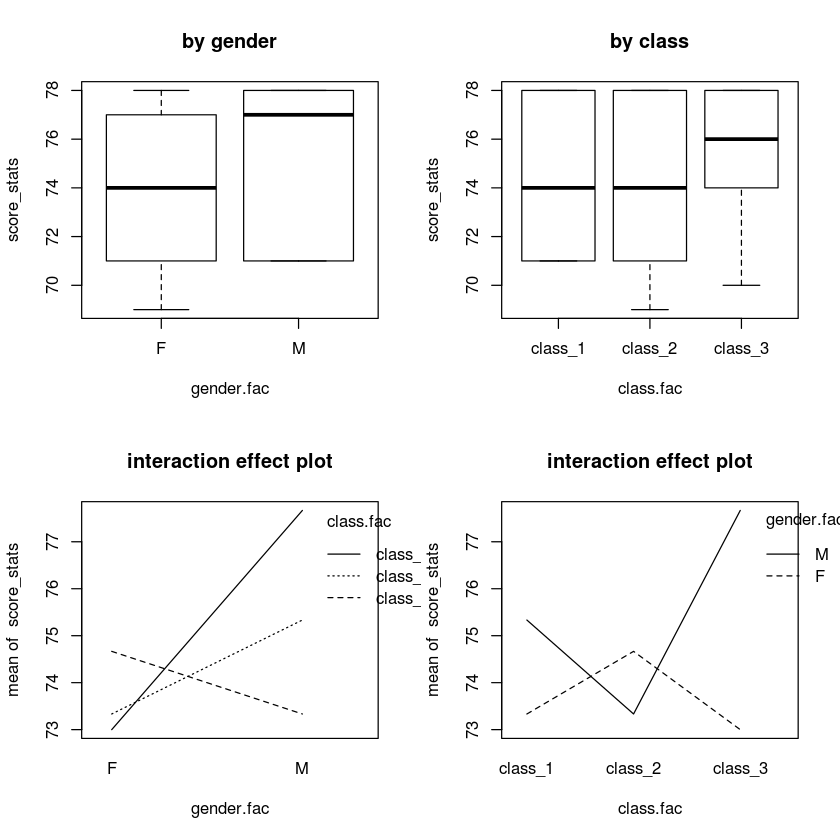

In [27]:
#boxplot and interaction plot
par(mfrow = c(2,2))
plot(score_stats ~ gender.fac, main = 'by gender')
plot(score_stats ~ class.fac, main = 'by class')
interaction.plot(gender.fac, class.fac, score_stats, main = 'interaction effect plot')
interaction.plot(class.fac, gender.fac, score_stats, main = 'interaction effect plot')

In [29]:
aov_model = aov(score_stats ~ gender.fac + class.fac + gender.fac:class.fac)
summary(aov_model)

                     Df Sum Sq Mean Sq F value Pr(>F)
gender.fac            1  14.22  14.222   1.085  0.318
class.fac             2   5.78   2.889   0.220  0.805
gender.fac:class.fac  2  27.11  13.556   1.034  0.385
Residuals            12 157.33  13.111               

먼저 교호작용이 있는지 살표보면 성별과 학급별에 따른 교호작용효과에 대한 피 벨류가 유의수준보다 크므로 귀무가설인 성별과 학급 교호작용에 의한 효과는 없다고 판단할 수 있습니다.
두번째로 성별에 따른 피벨류는 유의수준보다 크므로 귀무가설인 성별에 따른 차이는 없다고 판단할수 있습니다.
세번째로 학급요인에 대해서는 유의수준보다 크므로 귀무가설인 학급별 차이는 없다고 판단 할 수 있습니다.
> 만약 차이가 있다고 나온경우 사후검정 (post-hoc comparison)을 진행합니다.
